In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**1. Exploratory Data Analysis**

##**1.1 Read Data**

In [ ]:
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/Matkul_ML//Tugas Besar/dataset-tubes.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Disini atribut "id" tidak memiliki info apapun, maka saya akan membuang atribut tersebut.

In [ ]:
dataset = dataset.drop(['id'], axis=1)
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
dataset.shape

(5110, 11)

Mari melihat jenis data pada setiap atribut.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


##**1.2 Cek Missing Value**

Mari melihat atribut yang memiliki nilai Null

In [ ]:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Dapat dilihat disini bahwa atribut "BMI" memiliki missing value yang jumlahnya lebih dari 200

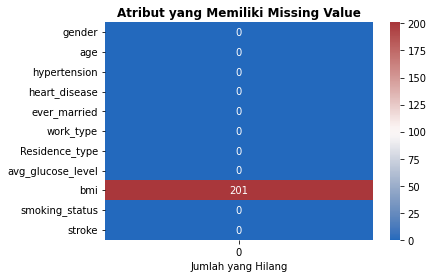

In [ ]:
plt.title('Atribut yang Memiliki Missing Value',fontweight='bold')
ax = sn.heatmap(dataset.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Jumlah yang Hilang')
plt.show()

Salah satu teknik mengatasi missing value yaitu **mengisinya dengan nilai rata-rata** dari atribut tersebut, maka saya disini akan mengisi missing value dengan nilai mean yang didapat dari atribut "BMI"

In [ ]:
dataset['bmi'].fillna(dataset['bmi'].mean(),inplace=True)
dataset['bmi'].isnull().sum()

0

Dapat dilihat pada tampilan dibawah ini bahwa tidak ada lagi missing value pada setiap atribut, maka kita akan masuk ke step berikutnya.

In [ ]:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##**1.3 Statistik Deskriptive Dataset**

In [ ]:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


##**1.4 Uniqe Value**

Seperti yang bisa kita lihat, dalam atribut 'gender', ada satu pengamatan yang bukan perempuan atau laki-laki yaitu nilai "other", karena itu saya akan menghapus nilai ini

In [ ]:
print(dataset['gender'].value_counts())
dataset = dataset[dataset['gender'] != "Other"]

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [ ]:
dataset['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

#**2. Visualisasi**

##**2.1 Matriks Korelasi**

Mari melihat korelasi antar atribut pada heatmap dibawah ini

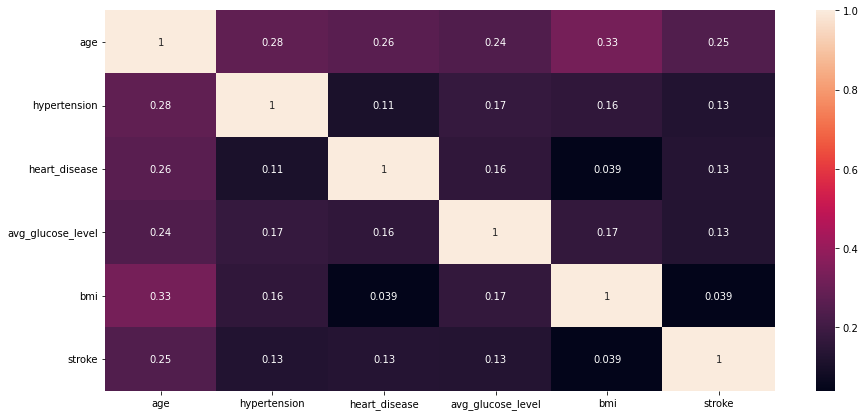

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(dataset.corr(),annot=True);

##**2.2 Diagram Bar Antar Atribut**

Mari kita visualisasikan beberapa atribut data untuk lebih memahaminya, visualisasi ini juga dapat mengungkapkan beberapa aspek data yang menarik. Perlu diketahui bahwa :**0 yaitu Tidak Ada Indikasi Struk, 1 yaitu Ada Indikasi Struk**

**1.   Apakah merokok, jenis pekerjaan, pilihan tempat tinggal memiliki hubungan dengan kemungkinan stroke? Mari kita cari tahu.**

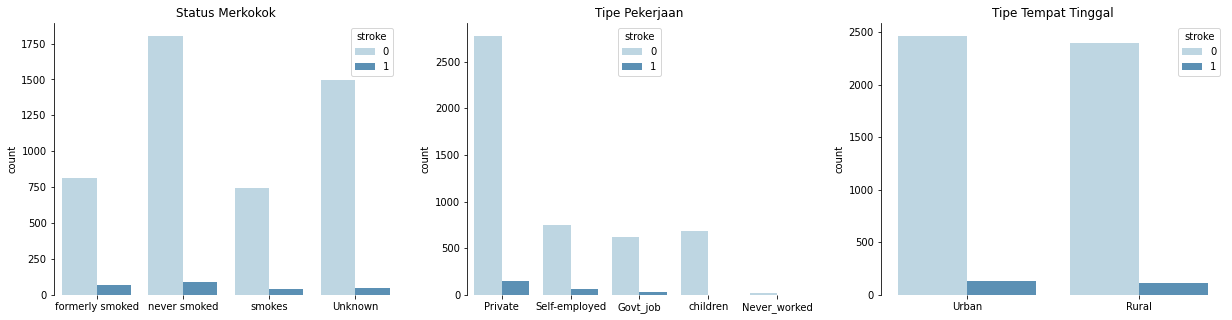

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=dataset['smoking_status'], alpha=0.8, palette="Paired",hue=dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Status Merkokok');

plt.subplot(1,3,2)
sns.countplot(x=dataset['work_type'], alpha=0.8, palette="Paired", hue=dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Tipe Pekerjaan');

plt.subplot(1,3,3)
sns.countplot(x=dataset['Residence_type'], alpha=0.8, palette="Paired", hue=dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Tipe Tempat Tinggal');

Dari plot di atas sepertinya tidak ada hubungan yang signifikan antara probabilitas stroke dan atribut "Smoking Status", "Work Type", "Residence Type"

**2.   Mari kita lihat apakah Faktor-faktor seperti jenis kelamin, hipertensi dan riwayat penyakit jantung mempengaruhi kemungkinan stroke**



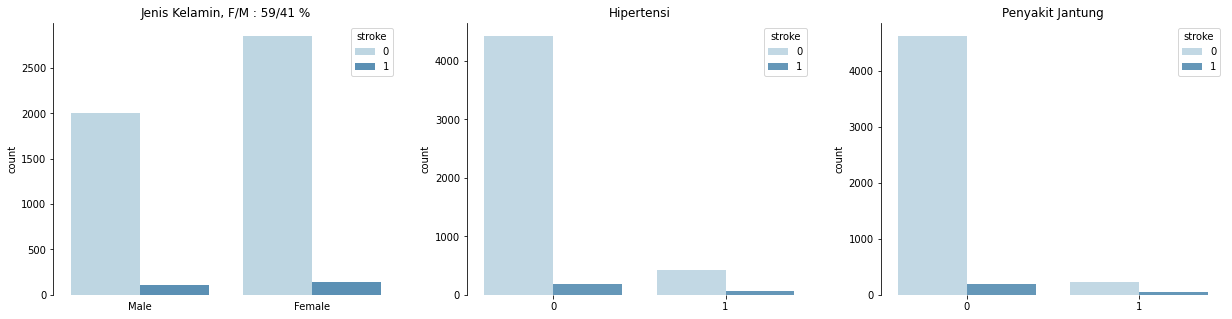

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.countplot(x=dataset['gender'], alpha=0.8, palette="Paired", hue=dataset['stroke']);
plt.tick_params(axis='both', which='both', bottom=False, left=True, right=False, top=False, labelbottom=True, labelleft=True);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('')
plt.title('Jenis Kelamin, F/M : 59/41 %');

plt.subplot(1,3,2)
sns.countplot(x=dataset['hypertension'], alpha=0.75, palette="Paired", hue=dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Hipertensi');

plt.subplot(1,3,3)
sns.countplot(x=dataset['heart_disease'], alpha=0.75, palette="Paired", hue=dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Penyakit Jantung');

Mempertimbangkan proporsi antara bar datas, tampaknya ada semacam hubungan antara beberapa atribut dan probabilitas stroke.

**3.   Mari kita lihat Usia, Rata-rata Tingkat Glukosa dan BMI untuk menemukan adakah korelasi dengan indikasi stroke**



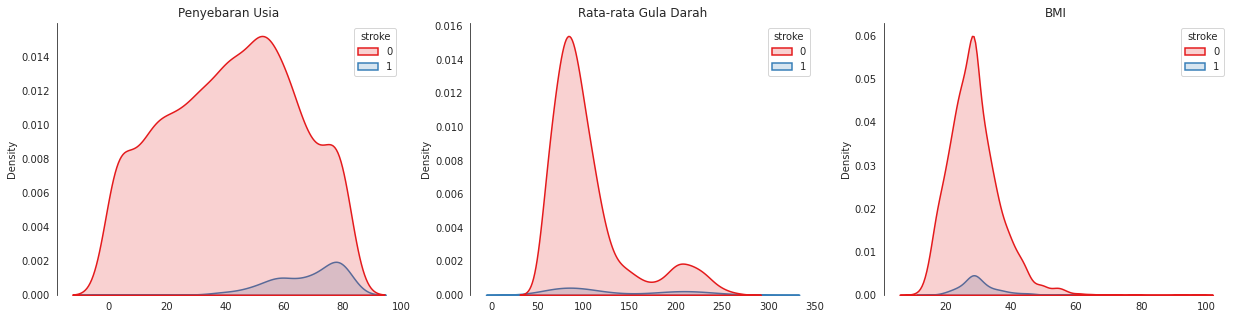

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style('white')
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.kdeplot(x=dataset['age'], alpha=0.2, palette="Set1", label='Smoker', fill=True, linewidth=1.5, hue=dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Penyebaran Usia');

plt.subplot(1,3,2)
sns.kdeplot(x=dataset['avg_glucose_level'], alpha=0.2, palette="Set1", label='avg_glucose_level',linewidth=1.5, fill=True, hue=dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('Rata-rata Gula Darah');

plt.subplot(1,3,3)
sns.kdeplot(x=dataset['bmi'], alpha=0.2, palette="Set1", label='BMI',shade=True, linewidth=1.5, fill=True, hue=dataset['stroke']);
sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=True, offset=None, trim=False);
plt.xlabel('');
plt.title('BMI');

Sepertinya ada hubungan yang kuat antara atribut-atribut ini dengan indikasi stroke.

**4.  Karena atribut-atribut diatas memiliki nilai kontinu, kita akan cek atribut-atribut ini lebih dekat dengan memasang garis regresi melalui distribusi**

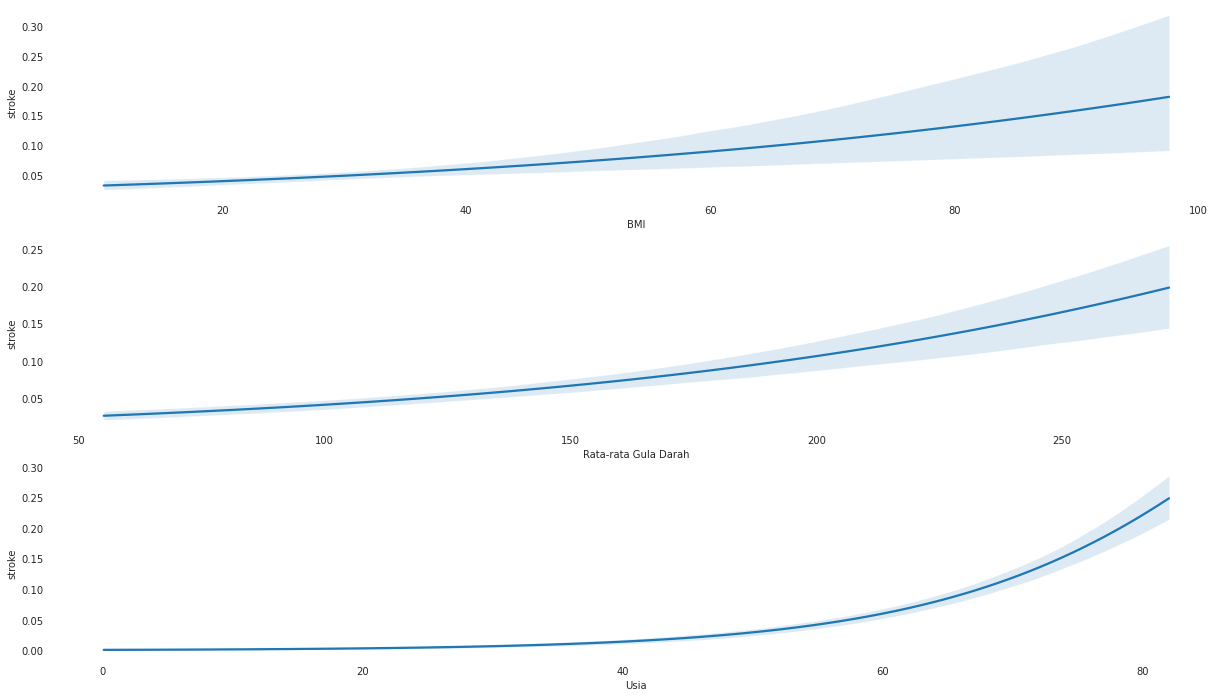

In [ ]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(21,12));

plt.subplot(3,1,1)
sns.regplot(x=dataset['bmi'], y=dataset['stroke'], scatter=False, logistic=True, label= 'BMI');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('BMI');

plt.subplot(3,1,2)
sns.regplot(x=dataset['avg_glucose_level'], y=dataset['stroke'], scatter=False, logistic=True, label='Avg Glucose Level');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('Rata-rata Gula Darah');

plt.subplot(3,1,3)
sns.regplot(x=dataset['age'], y=dataset['stroke'], scatter=False, logistic=True, label='Age');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.xlabel('Usia');

Usia tampaknya menjadi faktor yang mendominasi di sini, plot mengatakan bahwa indikasi peluang stroke meningkat seiring bertambahnya usia. Kadar glukosa dan BMI juga tampaknya memiliki hubungan positif dengan indikasi peluang stroke. Faktor-faktor ini akan berkontribusi besar dalam memprediksi probabilitas stroke.

#**3. Pre Processing Data**

##**3.1 Transformasi**

Di beberapa atribut seperti Jenis Kelamin, Jenis Tempat Tinggal maupun atribut yang mengandung unsur data "Nominal" akan diubah menjadi bentuk 0,1 ataupun 2, agar dataset dapat diolah, mengingat algoritma yang di pakai hanya bisa bekerja pada dataset yang berbentuk angka.

In [ ]:
dataset['gender'] = dataset['gender'].replace({'Male':0,'Female':1}).astype(np.uint8)
dataset['Residence_type'] = dataset['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
dataset['work_type'] = dataset['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
dataset['ever_married'] = dataset['ever_married'].replace({'Yes':1, 'No':0}).astype(np.uint8)
dataset['smoking_status'] = dataset['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}).astype(np.uint8)

In [ ]:
dataset.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,1,80.0,1,0,1,0,1,83.75,28.893237,0,0
5106,1,81.0,0,0,1,1,1,125.20,40.000000,0,0
5107,1,35.0,0,0,1,1,0,82.99,30.600000,0,0
5108,0,51.0,0,0,1,0,0,166.29,25.600000,2,0
5109,1,44.0,0,0,1,2,1,85.28,26.200000,1,0


In [ ]:
X = dataset[["gender", "age", "hypertension", "heart_disease", "ever_married",	"work_type",	"Residence_type",	"avg_glucose_level", "bmi",	"smoking_status"]]
y = dataset["stroke"]

print(X.count())
print(y.count())

gender               5109
age                  5109
hypertension         5109
heart_disease        5109
ever_married         5109
work_type            5109
Residence_type       5109
avg_glucose_level    5109
bmi                  5109
smoking_status       5109
dtype: int64
5109


##**4.1 Mengatasi Imbalance Data Dengan Oversampling**

In [ ]:
print("Sebelum Oversampilng, Jumlah data label nomor '1': {}".format(sum(y==1)))
print("Sebelum Oversampilng, Jumlah data label nomor '0': {} \n".format(sum(y==0)))

Sebelum Oversampilng, Jumlah data label nomor '1': 249
Sebelum Oversampilng, Jumlah data label nomor '0': 4860 



In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE()
X, y = sm.fit_resample(X, y)
print("Setelah Oversmpling, Jumlah data label nomor '1': {}".format(sum(y==1)))
print("Setelah Oversmpling, Jumlah data label nomor '0': {}".format(sum(y==0)))

Setelah Oversmpling, Jumlah data label nomor '1': 4860
Setelah Oversmpling, Jumlah data label nomor '0': 4860


Membuat skala di masing-masing variabel untuk menstandarisasi variabel independen dengan nilai distribusi rata-rata 0 dan varians sama dengan 1

#**4. Membangun Model**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

print("Jumlah Data Untuk x_train : ", X_train.shape)
print("Jumlah Data Untuk y_train : ", y_train.shape)
print("Jumlah Data Untuk x_test  : ", X_test.shape)
print("Jumlah Data Untuk y_test  : ", y_test.shape)

Jumlah Data Untuk x_train :  (2916, 10)
Jumlah Data Untuk y_train :  (2916,)
Jumlah Data Untuk x_test  :  (6804, 10)
Jumlah Data Untuk y_test  :  (6804,)


##**4.2 SVM**

In [ ]:
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
model_sv=SVC (kernel='poly', C=1, gamma=0.05, degree=7)

In [ ]:
model_sv.fit (X_train, y_train)
y_pred=model_sv.predict(X_test)
confusion_matrix(y_test, y_pred) 
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.25      0.40      3419
           1       0.56      0.98      0.72      3385

    accuracy                           0.61      6804
   macro avg       0.74      0.62      0.56      6804
weighted avg       0.74      0.61      0.56      6804



#**4.3 KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=2) 
KNN.fit(X_train,y_train)  
print(KNN.score(X_test,y_test))

0.8678718400940623


In [ ]:
y_pred=KNN.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3419
           1       0.87      0.86      0.87      3385

    accuracy                           0.87      6804
   macro avg       0.87      0.87      0.87      6804
weighted avg       0.87      0.87      0.87      6804

